Класс линейной регрессии обучающийся градиентным спуском

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Веса обновляются следующим образом:

𝑤(𝑡+1)=𝑤(𝑡)−𝛼𝑡∇𝑄(𝑤(𝑡)), 

а  𝑗 -ая компонента градиента расписывается как

∂𝑄(𝑤)𝑤𝑗=2𝑙∑𝑖=1𝑙𝑥𝑖𝑗(⟨𝑤,𝑥𝑖⟩−𝑦𝑖).

Реализация градиентного спуска

In [2]:
from sklearn.base import BaseEstimator

class LinearRegression(BaseEstimator):
    # функция инициализации
    def __init__(self, epsilon=1e-4, max_steps=1000, w0=None, alpha=1e-2):
        """
        epsilon: разница для нормы изменения весов
        max_steps: максимальное количество шагов в градиентном спуске
        w0: np.array (d,) - начальные веса
        alpha: шаг обучения
        """
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []

    # функция обучения линейной модели 
    def fit(self, X, y):
        """
        X: np.array (l, d)
        y: np.array (l)
        ---
        output: self
        """

        # количество объектов и признаков
        l, d = X.shape

        # если не задано начальное приближение, то иницализация веса нулями
        if self.w0 is None:
          self.w0 = np.zeros(d)

        # итоговый вес, будет равен w0
        self.w = self.w0

        # итерации градиентного спуска по количеству шагов max_steps
        for step in range(self.max_steps):
          # записываем в историю текущие веса
          self.w_history.append(self.w)
        
          # новые веса w_new = w - шаг обучения * градиент (веса обновляем по формуле выше)
          w_new = self.w - self.alpha * self.calc_gradient(X, y)

          # если веса не сильно различаются, то делаем следующие шаги градиентного спуска
          # считаем разность между новыми весами и старыми w_new - self.w
          # расчет нормы от это разницы (np.linalg.norm(w_new - self.w)
          # если норма меньше чем epsilon, то выходим из цикла
          if (np.linalg.norm(w_new - self.w) < self.epsilon):
            break
          
          # обновляем веса (записывам новые веса)
          self.w = w_new

        # возвращаем сам класс
        return self
    
    # метод, который по новым объектам будет возвращать предсказание модели
    def predict(self, X):
        """
        X: np.array (l, d)
        ---
        output: np.array (l)
        """

        # если нет весов, то возвращаем, что модель не обучена
        if self.w is None:
            raise Exception('Not trained yet')

        l, d = X.shape

        # лист с результатами
        y_pred = []

        for i in range(l):
          # применение линейной модели - скалярное произведение X[i] на w для конкретного объекта
          y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)

    # служебная функция для расчета градиента в текущей точке
    def calc_gradient(self, X, y):
        """
        X: np.array (l, d) матрица объектов и признаки
        y: np.array (l) целевая переменная
        ---
        output: np.array (d)
        """

        l, d = X.shape
        # лист с градиентами
        gradient = []

        # итерация по всем признакам, для получения конкретной компоненты j
        for j in range(d):
          # сумма равна нулю
          dQ = 0
          # итерация по всем объектам
          for i in range(l):
            # скалярное произведение векторов весов и X[i]: np.dot(X[i], self.w)
            dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
          gradient.append(dQ)

        return np.array(gradient)

Настройка градиентного спуска

Визуализация траектории градиентного спуска

In [ ]:
# функция, которая по данным и истории обучения визуализирует функцию
def plot_gd(X, y, w_history):
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [ ]:
# признаки, объекты и шаг
n_features = 2 
n_objects = 300
num_steps = 100

# фиксация случайных вычислений
np.random.seed(1)
# генерация весов
w_true = np.random.normal(0, 0.1, size=(n_features, ))
# генерация начальных приближений весов
w_0 = np.random.uniform(-2, 2, (n_features))
# обучающие данные
X = np.random.uniform(-5, 5, (n_objects, n_features))
# целевая переменная
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

Обучение линейной регрессии

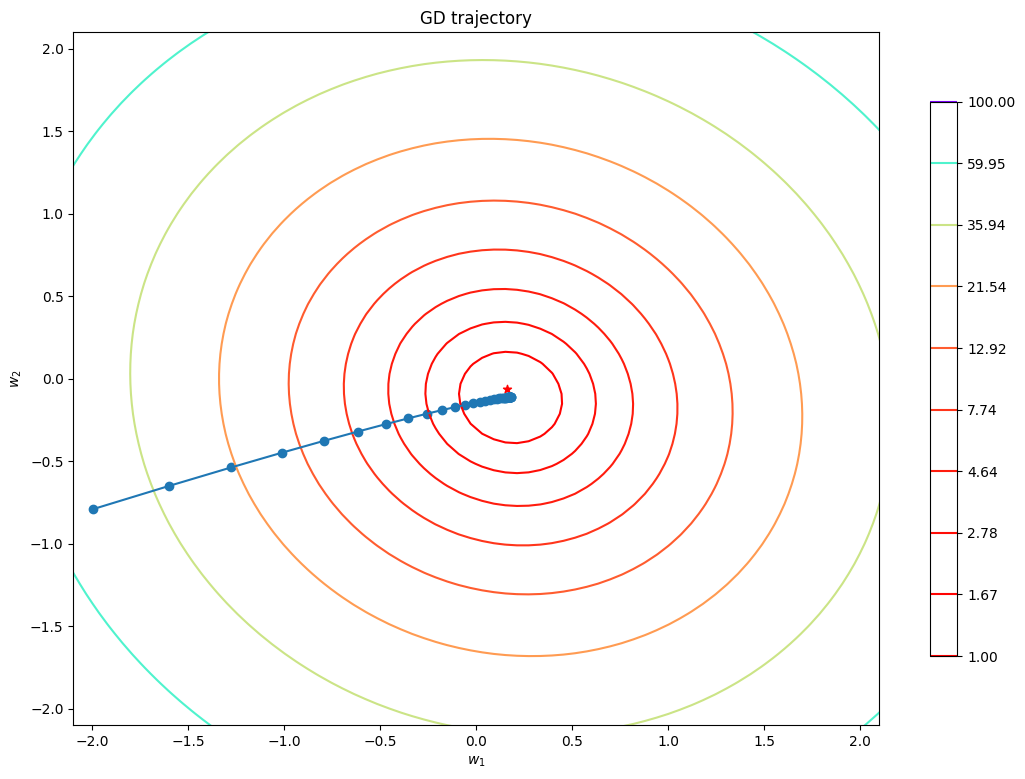

In [ ]:
# начальное приближение весов w_0
lr = LinearRegression(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

Синий - траектория градиентного спуска, видно, что когда шаги стали маленькими и веса почти не менялись, алгоритм остановил совю работу
<br>Закончен алгоритм близко к оптимуму, модель обучена достаточно хорошо

Влияние размера шага на сходимость

Изменение поведения полного градиентного спуска в зависимости от размера шага

𝛼=0.0001

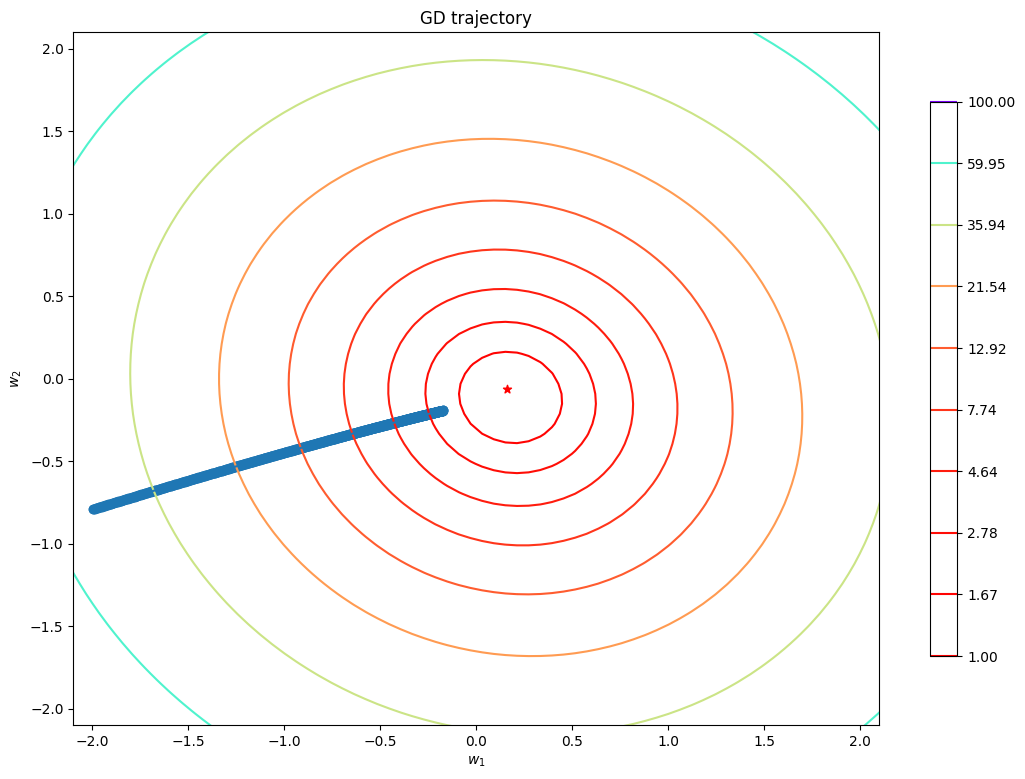

In [6]:
lr = LinearRegression(w0=w_0, alpha=0.0001)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

При совсем маленьком шаге, не успеваем дойти до оптимума <br>Решение задачи не оптимально

𝛼=0.01

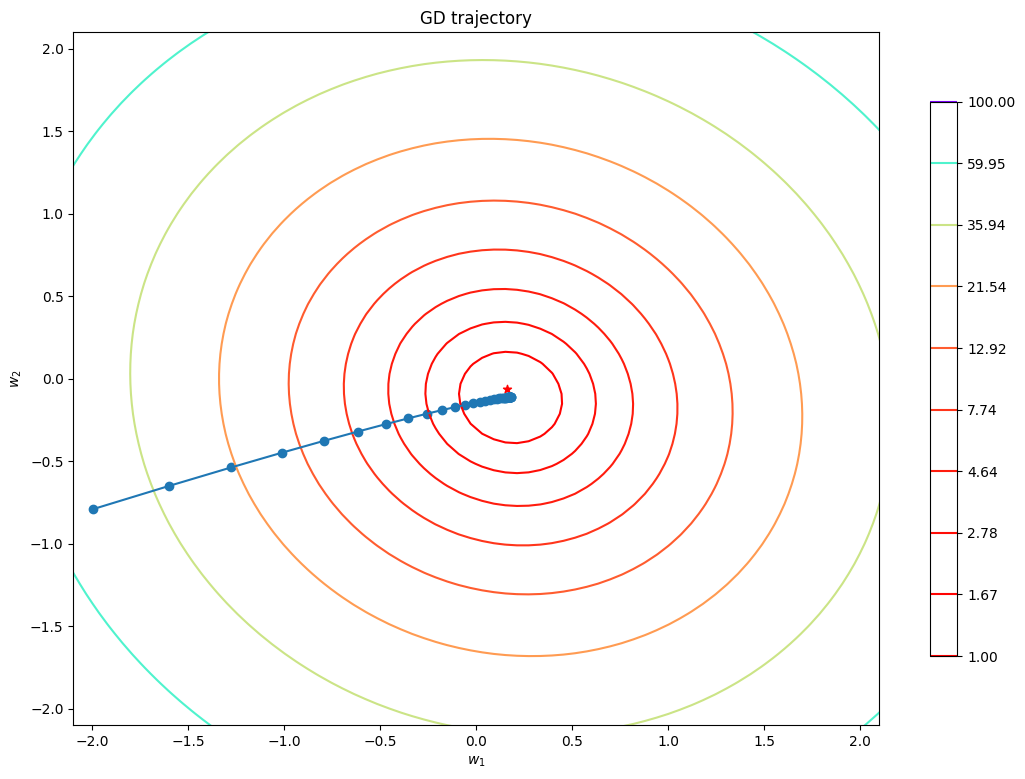

In [7]:
lr = LinearRegression(w0=w_0, alpha=0.01)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

При данном шаге - хорошая сходимость <br>Веса близки к оптимальному значению

𝛼=0.1

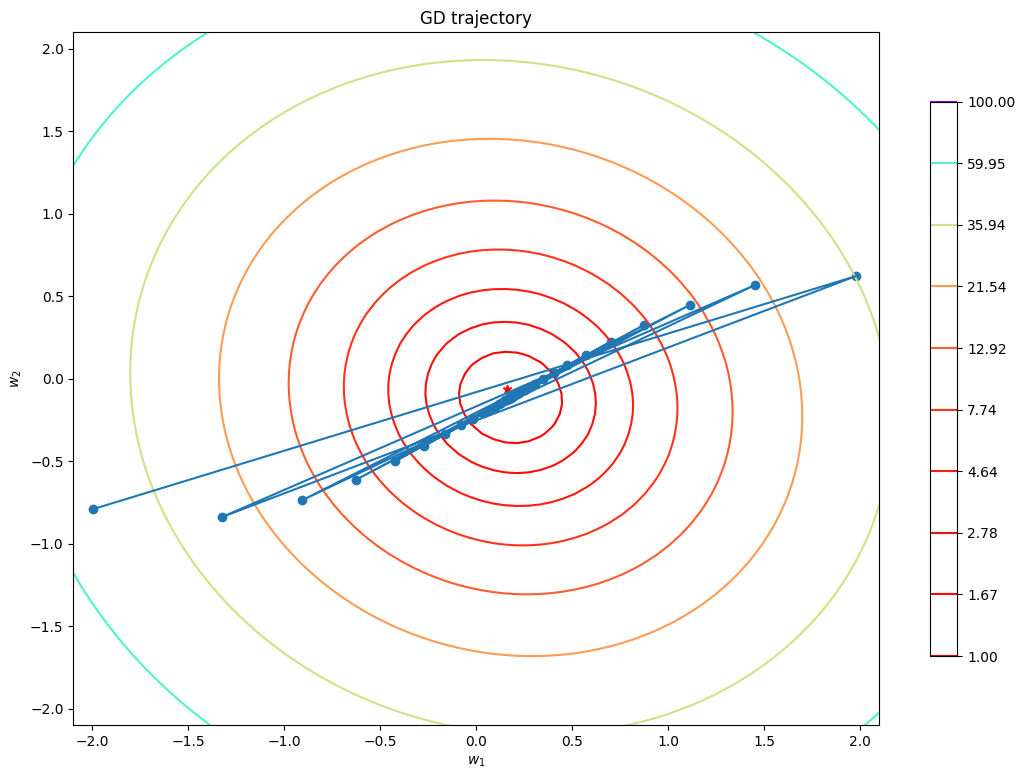

In [8]:
lr = LinearRegression(w0=w_0, alpha=0.1)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

При данном шаге, видно, что движемся к оптимуму, но шаг слишком большой и мы перелетаем через оптимума <br>Это можно избежать, если уменьшать шаг при каждой интерации

Масштабирование функции

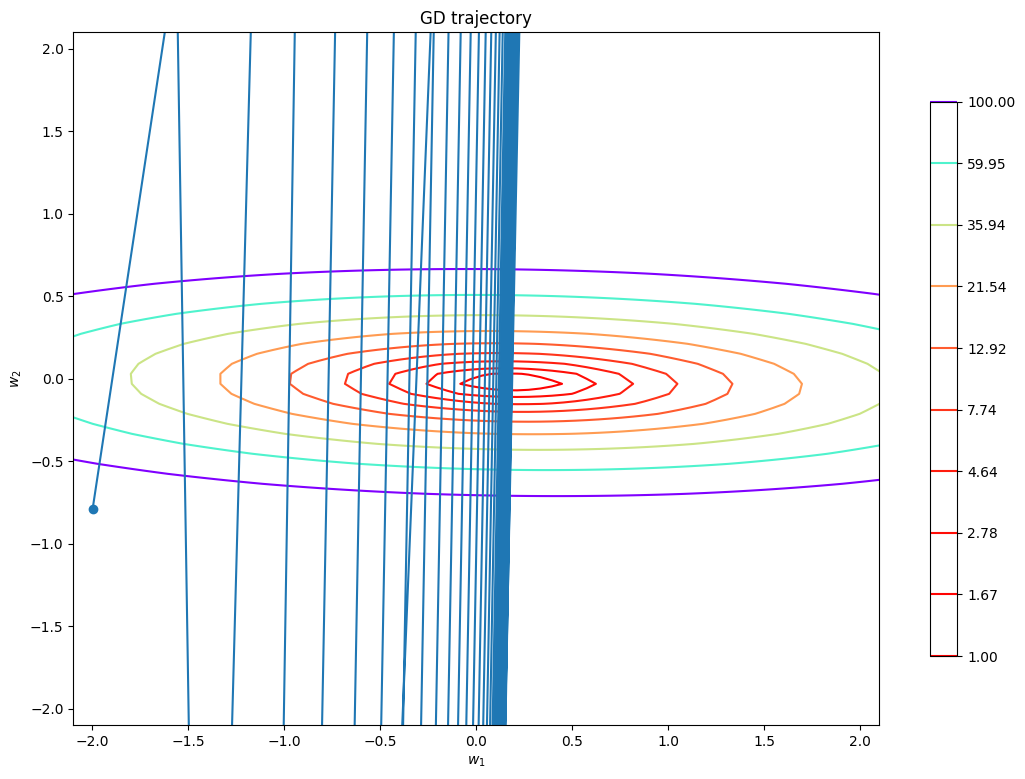

In [ ]:
X_new = X.copy()
# масштабирование (увеличение в 5 раз) второго столбца матрицы признаков X
X_new[:,1] = X_new[:,1] * 5

lr = LinearRegression(w0=w_0, alpha=0.01)
lr.fit(X_new, y)
plot_gd(X_new, y, lr.w_history)

Видим, что по одной из координат функция вытянута в 5 раз <br>Каждый раз, когда шагаем вдоль градиента, шагаем перпендикулярно линиям уровня, шаг становится слишком большим, перелетаем через оптимум <br>Когда обучаем линейные модели с помощью градиентного спуска, необходимо всегда масштабировать данные (стандартизировать)